- Student 1 Name: Ans Imran
- Student 2 Name: Ahmad Hassan

# Solving Conductive Heat Transfer: Case of a window, with and without an  air layer

In this training we wish to solve the 1D  conductive heat transfer problem. We will consider heat transfer in a 1D slab of material It could be a glass window for example.. The medium has a width L and a thermal conductivity K and a specific heat Cp and density $\rho$. 



The 1D heat diffusion equations reads :
    $\frac{\partial T}{\partial t}-\frac{K}{\rho Cp}\frac{\partial^2 T}{\partial x^2}=\frac{SK}{\rho Cp}$

where S is an energy source term (in $w/m^2$) that is non-zero if we inject energy in the system. For the moment we will assume that S=0

For glass, $K\simeq 1 w/m/K$, Cp=753 J/Kg/K, $\rho=2500 Kg/m^3$

In [210]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import scipy as sc
from scipy import sparse
# Update the matplotlib configuration parameters:
mt.rcParams.update({'font.size': 13, 'font.family': 'serif'})


k = 1
cp = 753
rho = 2500

## Diffusion timescale and the Courant condition (CFL)

We assume initially that the glass width is L =1 cm, and that the temperature everywhere is 300K initially. The right (x=0) and left (x=L) temperatures of the glass are $T_L$ and $T_R$. We will change the glass left and right temperatures and see how the temperature profile (T(x) for x ranging from 0 to L) evolves.

In [211]:
L = 0.01   # 0.01 m = 1 cm
T0 = 300

By doing a simple dimensional analysis, find a characteristic timescale $T_d$ using L (the width of the window),  $T_d$ as a functio of L, K, $\rho$ $Cp$. $T_d$ is the diffusion timescale. We can also recognize that $D=K/\rho C_p$ is a diffusion coefficient, so the classical theory for diffusion processes applies here... 

In [212]:
D = k/(rho*cp)
D

5.312084993359894e-07

The 1D heat diffusion equations in the present case is:
$\frac{\partial T}{\partial t}-D\frac{\partial^2 T}{\partial x^2} = 0$
    
writing it in terms of units we get:
    
$ \frac{K}{T_{d}} - D \frac{K}{L^2} = 0 $
    
$ \frac{K}{T_{d}} = D \frac{K}{L^2} $

$ D = \frac{L^2}{T_{d}} $

$ \implies T_{d} = \frac{L^{2}}{D} $      where     $D=K/\rho C_p$



$T_d=??$

In [213]:
Td = (L**2)/D

print(f'The value of T_d is: {Td}')
print('This is the time that it takes for the heat to diffuse throughout the rod')

The value of T_d is: 188.25
This is the time that it takes for the heat to diffuse throughout the rod


## Discretization of the problem

Now we want to solve the diffusion equation using a finite difference method.
We need first to write the integration scheme.
we call $x_i=i*dx$, $t_j=j*dt$ with i,j, integers, and dt and dx standing for the timestep and space step respectively. Let's call $T_i^j$ the numerical approximation to $T(x_i,t_j)$

We start soing first order in time and second order in space. 
For the time derive use a forward 1st order derivative. Give the 1st order forward approximation.

$$ \frac{\partial T_{i}^{j}}{\partial t}= \frac{T_{i}^{j+1} - T_{i}^{j}}{ dt}  +o(dt) $$

For the temperature space derivative we need the second order derivative. As diffusion is a process acting in both directions simultaneously we can use a centered scheme. Provide a 1st order centered approximation to the second order derivative : You can have a look here : https://en.wikipedia.org/wiki/Finite_difference

$$ \frac{\partial^2 T_{i}^{j}}{\partial x^2}= \frac{ T_{i+1}^{j} -2T_{i}^{j} + T_{i-1}^{j} }{ dx^{2} }  +o(dx^2) $$

From the above two expressions, build an integration scheme for the Heat diffusion equation :

$$T^{j+1}_i = (1-2 \sigma)T^{j}_{i} + \sigma (T_{i-1}^{j} + T_{i+1}^{j}) $$

where:
$ \sigma = \frac{D * dt}{dx^{2}} $   and   $ \sigma < \frac{1}{2} $, something similar to the CFL condition

where:
$D = \frac{K}{\rho Cp}$

We will discretise space by using N=50 cells. What is the time necessary, $T_{cell}$ for heat to diffuse over a cell ??  
 

Since, $ T_{d} $ is the time for the heat to diffuse throughout the rod.

Therefore, the time for the heat to diffuse through one cell $ T_{cell} $ will be,

$$T_{cell} = T_{d}/50 $$

In [214]:
N = 50

Tcell = Td/N

print(f'The value of T_cell is: {Tcell} seconds')

The value of T_cell is: 3.765 seconds


## Numerically solving heat transfer accross the window

We will make sure, in the following to choose dt < $T_{cell}$. This will be our "CFL" condition in the diffusion case.


As boundary conditions, we will put $T_1^0=T_L$ and $T_N^0=T_R$, with $T_R=300K$ (warm interior) and $T_L=273K$ (freezing cold outside!).

The initial state is $T^0_{2..N-1}=300K$

integrate the evolution of the temperature from t=0 to $t_{end} = 10 T_d$


Write the code that compute the Evolution of the temperature profile. You have to 

*1) Define the X axis, dt, dx, the different constant, TR, TL

*2) Initialise T

*3) Do a loop over time. 

*4)      Compute dT/dt for each space bin i

*5)      Update T for each space bin i 

*6)     Update time

*7)     end of loop








In [215]:
T_L = 273
T_R = 300

def results(h, tf, T_M):
    Total_time  = 10*tf
    dt          = 0.001                      
    t_intervals = int( Total_time//h )      # no. of time intervals

    T = np.zeros((N,t_intervals))# initially this matrix is full of zeros, later it's succesive columns will give the time evolution

    # initial boundary conditions and initial temperature distribution
    T[0,0]    = T_L  # left end at time '0' is at 273 K
    T[N-1,0]  = T_R  # right end at time '0' is at 300 K

    T[1:15,0]  = T_R  # the initial temperature of cell# 2  - cell# 15
    T[15:36,0] = T_M  # the initial temperature of cell# 16 - cell# 35
    T[35:,0]   = T_R  # the initial temperature of cell# 36 - cell# 50


    # We'll use constant boundary conditions i.e. T = 273 all the time for outside (which is reasonable, since it's a very large reservoir)
    # T = 300 all the time for interior (which is again reasonable, given the room is also a large reservoir)

    T[0,1:]  = T_L   # setting T_L = 273 for all time
    T[-1,1:] = T_R   # setting T_R = 300 for all time
    
    return T, t_intervals


dt = 0.001  # it is smaller than T_cell i.e. smaller than 3.765

T1, intervals = results(dt, Td, 300)

dx    = L/N               # L is 0.01 meter
sigma = (D*dt)/(dx**2)
print('sigma =: ',sigma)

sigma =:  0.013280212483399736


### It'll take some time to run

In [216]:
for j in range(intervals-1): # j runs over time intervals
    for i in range(N-2):       # i runs over space cells  #(N-2) makes sure that the code is not changing the value at right end
        T1[i+1,j+1] = (1 - 2*sigma)*T1[i+1,j]  +  sigma*(T1[i,j] + T1[i+2,j]) #T[i+1, ... ] makes sure that the code is not changing
                                                                              # the value at the Left end

DO : Provide 5 or 6 plots from 0 to $t_{end}$ display how heat is transfered

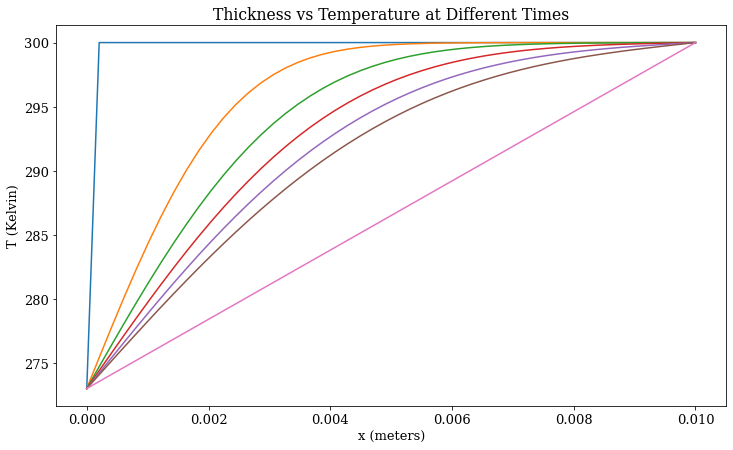

In [217]:
def plotter(result, xf, q):

    a = np.linspace(0, xf, 50) # positions of space-cells/space-points

    plt.figure(figsize=(12,7))
    plt.title('Thickness vs Temperature at Different Times')
    plt.plot(a,result[:,0])
    plt.plot(a,result[:,3000*q])
    plt.plot(a,result[:,6000*q])
    plt.plot(a,result[:,9000*q])
    plt.plot(a,result[:,12000*q])
    plt.plot(a,result[:,15000*q])
    plt.plot(a,result[:,-1])
    plt.xlabel('x (meters)')
    plt.ylabel('T (Kelvin)')
    plt.show()
    return a

c = plotter(T1, L, 1)

DO : show that at equilibrium the thermal gradient is constant.

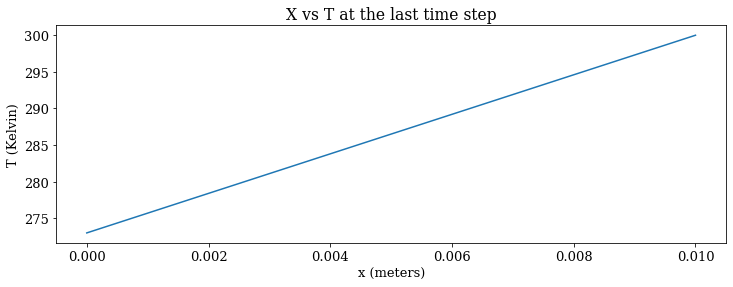

It can be seen that the slope of x Vs T graph is constant for the last time step, therefore we can say that 
AT EQUILIBRIUM THE THERMAL GRADIENT IS CONSTANT 
i.e. the temperature is increasing linearly from cell to cell towards the right.
Furthermore, we can also calculate the explicit value of the slope using the slope formula
The value of slope is: 2699.999999494675 , almost 2700


In [218]:
plt.figure(figsize=(12,4))
plt.plot(a,T[:,-1])
plt.title('X vs T at the last time step')
plt.xlabel('x (meters)')
plt.ylabel('T (Kelvin)')
plt.show()


print('It can be seen that the slope of x Vs T graph is constant for the last time step, therefore we can say that ')
print('AT EQUILIBRIUM THE THERMAL GRADIENT IS CONSTANT ')
print('i.e. the temperature is increasing linearly from cell to cell towards the right.')
print('Furthermore, we can also calculate the explicit value of the slope using the slope formula')

m = (T[-1, -1]-T[-2, -2])/(a[-1] - a[-2])

print(f'The value of slope is: {m} , almost 2700')


## Heat flux toward the exterior : energy loss 

At equilibrium what is the heat flux ? F=-K$\frac{\partial T}{\partial x}$ coefficient 

In [219]:
# since dt/dx is just the slope, and since we have already calculated it in the above exercise, so, we directly use it's value here
F = -k*(m)
F

-2699.999999494675

F = -2700  w $m^{-2}$

## Inserting an insulating air-layer

Now we put an insulating layer with air. So our window is like a "sandwich", with 0.3 mm of glass, 0.4 mm of air, 0.3 mm of glass.  Air characteristics are at 273K :
K=0.025 W/m/K , Cp=1005 J/K/Kg, and $\rho= 1.30 Kg/m^3$.

### We'll assume the initial temperature of the air to be 273 K

Redo the same exercice as above :

Write the new code (BEWARE : now K, RHO, Cp are not the same evrywhere!!!!)

In [220]:
L_new   = 0.001  # 1mm = 0.01 meter 
T_air   = 273    # we'll assume that initially the temperature throughout the air-region is 273 kelvin
K_air   = 0.025
Cp_air  = 1005
rho_air = 1.3
D_air   = K_air/(rho_air*Cp_air)

Td_new  = (L_new**2)/np.average([D,D,D,D,D,D,D_air,D_air,D_air,D_air]) # since D, is now NOT constant, therefore, we are taking
                                              # a WEIGHTED AVERAGE of D_air and D_glass i.e. (4*D_air + 6*D_glass)/10
Tcell_new = Td_new/N
print('Tcell_new is: ',Tcell_new)
Total_time_new  = 10*Td_new
print('New Total time is: ', Total_time_new)


dt_new          = 1e-6                      # it is smaller than Tcell_new i.e. smaller than 0.002
T2, intervals_2 = results(dt_new, Td_new, 273)
print('Total No. of intervals will be: ', intervals_2)


dx_new          = L_new/N               # L is 0.01 meter
sigma_air       = (D_air*dt_new)/(dx_new**2)
sigma_glass_new = (D*dt_new)/((dx_new)**2)  # sigma_glass will change, because 'L' has changed and it has caused a change in dx
print('sigma_air = ',sigma_air, '  sigma_glass_new =', sigma_glass_new)


Tcell_new is:  0.002508540764652785
New Total time is:  1.2542703823263925
Total No. of intervals will be:  1254270
sigma_air =  0.04783773440489857   sigma_glass_new = 0.0013280212483399733


### It'll take some time to run

In [221]:
# this cell will take some time to run, be patient

for j in range(intervals_2-1): # j runs over time intervals
    for i in range(N-2):       # i runs over space cells  #(N-2) makes sure that the code is not changing the value at right end
        if i > 0 and i <= 14:
            T2[i+1,j+1] = (1 - 2*sigma_glass_new)*T2[i+1,j]  +  sigma_glass_new*(T2[i,j] + T2[i+2,j])
            
        elif i > 14 and i <= 34:
            T2[i+1,j+1] = (1 - 2*sigma_air)*T2[i+1,j]  +  sigma_air*(T2[i,j] + T2[i+2,j])
            
        else:
            T2[i+1,j+1] = (1 - 2*sigma_glass_new)*T2[i+1,j]  +  sigma_glass_new*(T2[i,j] + T2[i+2,j])


What is the effect of the insulating layer ? Show with plots 

What is the Thermal profile in the thickness of the window ?


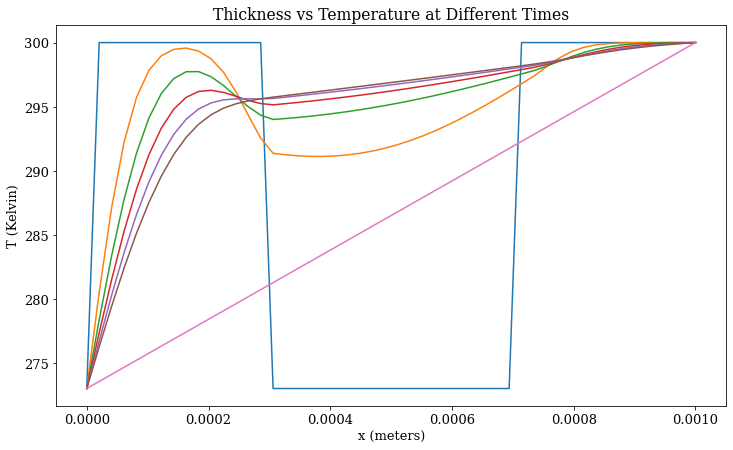

In [224]:
d = plotter(T2, L_new, 1)

The effect of insulating layer AND the thermal profile in the thickness of the window is shown in the above plots. We assumed that the initial temperature of the air-region was 273 kelvin. We assumed that the temperaure throughout the glass-regions was 300 kelvin, except at the left end, where it was 273 kelvin. We used constant boundary conditions i.e. temperature at the right and left ends was fixed at 300 and 273 kelvin respectively, all the time.

## What is the heat flux at steady state ?

In [225]:
# the new slope is
m_new = (T2[-1, -1] - T2[-2, -2])/(d[-1] - d[-2])
print(f'The value of slope is: {m} , AGAIN almost 2700')

F_new = -k*(m_new)  # since we are calculating the heat flux towards the exterior, and since the exterior is in glass-region 
                    # therefor we used 'k_glass'
print("The heat flux is AGAIN : ",F_new, ' w m^{-2}')

The value of slope is: 2699.999999494675 , AGAIN almost 2700
The heat flux is AGAIN :  -26999.999355168162  w m^{-2}


# Same calculations, but now we'll assume the initial temperature of the air to be 300 K

In [226]:
T3, intervals_3 = results(dt_new, Td_new, 300)

### It'll take some time to run

In [227]:
# this cell will take some time to run, be patient

for j in range(intervals_3-1): # j runs over time intervals
    for i in range(N-2):       # i runs over space cells  #(N-2) makes sure that the code is not changing the value at right end
        if i > 0 and i <= 14:
            T3[i+1,j+1] = (1 - 2*sigma_glass_new)*T3[i+1,j]  +  sigma_glass_new*(T3[i,j] + T3[i+2,j])
            
        elif i > 14 and i <= 34:
            T3[i+1,j+1] = (1 - 2*sigma_air)*T3[i+1,j]  +  sigma_air*(T3[i,j] + T3[i+2,j])
            
        else:
            T3[i+1,j+1] = (1 - 2*sigma_glass_new)*T3[i+1,j]  +  sigma_glass_new*(T3[i,j] + T3[i+2,j])


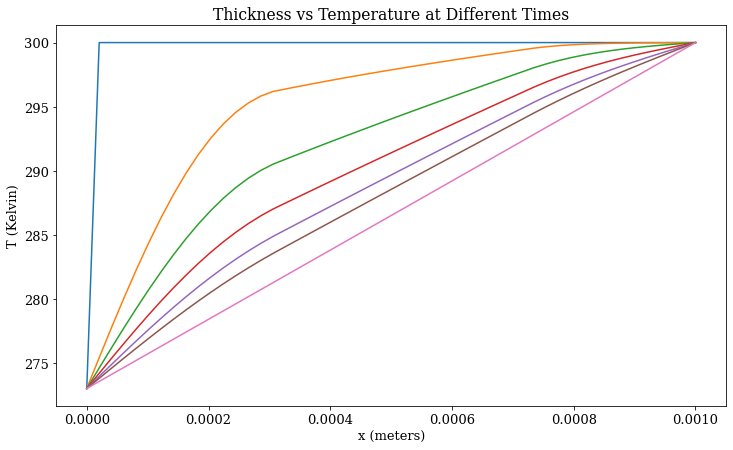

In [228]:
e = plotter(T3, L_new, 10)

At the position, where the air layer starts (0.3 mm) we see a little bend, and when the air layer ends (0.7 mm), we again see a little bend in the graph.

What is the heat flux at steady state ?

In [229]:
# the new slope is

m_new = (T3[-1, -1] - T3[-2, -2])/(e[-1] - e[-2])
print(f'The value of slope is: {m_new} , AGAIN almost 2700')

F_new = -k*(m_new)  # since we are calculating the heat flux towards the exterior, and since the exterior is in glass-region 
                    # therefor we used 'k' for glass region
print("The heat flux is now : ",F_new, ' w m^{-2}')

The value of slope is: 26999.999235613548 , AGAIN almost 2700
The heat flux is now :  -26999.999235613548  w m^{-2}


## 2nd order in time method (optional)

optional : Redo the resolution but with a method that is second order in time, like leap frog. Check your solution.


We'll use the The DuFort-Frankel Method.

To approximate the time derivative, we use a 2nd order accurate, central difference:
$$ \frac{\partial T_{i}^{j}}{\partial t} = \frac{ T_{i}^{j+1} - T_{i}^{j-1} }{2 dt} $$

To approximate the 2nd order space derivative, we use a a 1st order centered approximation:
$$ \frac{\partial^2 T_{i}^{j}}{\partial x^2}= \frac{ T_{i+1}^{j} -2T_{i}^{j} + T_{i-1}^{j} }{ dx^{2} }  $$

Now, we replace $ T_{i}^{j} $ in the above equation by the average $ T_{i} $ at time levels j+1 and j-1 i.e. 
$$ T_{i}^{j} = \frac{T_{i}^{j+1} + T_{i}^{j-1}}{2} $$

Substituting it back in the 2nd last equation we get:
$$ \frac{\partial^2 T_{i}^{j}}{\partial x^2}= \frac{ T_{i+1}^{j} -2 \frac{T_{i}^{j+1} + T_{i}^{j-1}}{2} + T_{i-1}^{j} }{ dx^{2} }  $$


The 1D Heat Equation was:
$$\frac{\partial T}{\partial t}-D\frac{\partial^2 T}{\partial x^2} = 0$$

Substituting the results in the heat equation, we get,

$$ \frac{T_{i}^{j+1} - T_{i}^{j-1}}{2 dt} = \left(\frac{D*dt}{dx^{2}}\right) \frac{ T_{i+1}^{j} - T_{i}^{j+1} - T_{i}^{j-1} + T_{i-1}^{j} }{ dx^{2} } $$

setting $\frac{D*dt}{dx^{2}} = \sigma$ and rearranging the above equation, we get:


$$ (1 + 2 \sigma)T_{i}^{j+1} = (1 - 2 \sigma) T_{i}^{j-1} + 2 \sigma ( T_{i+1}^{j} + T_{i-1}^{j} ) $$

It is unconditionally stable.

Reference:
Numerical Methods for Engineers and Scientists - Joe D. Hoffmann - Second Edition Revised and Explained - pg = 613

## Without an insulating layer

In [230]:
T4, intervals_4 = results(dt, Td, 300)

##############################################################
T4[1:-1,1] = T1[1:-1,1]     # in order to calculate T(j+1), we need T(j) and T(j-1), so here we are using T(2), which was calculated 
                            # using the previous first order time accurate method
##############################################################

sigma_n = (2*D*dt)/(dx**2)  # the new sigma is simply the old sigma multiplied by '2'
print('sigma =: ',sigma_n)

sigma =:  0.026560424966799473


### It'll take some time to run

In [231]:
for j in range(intervals_4-2):
    for i in range(N-2):
        T4[i+1,j+2] = (1/( 1 + sigma_n )) * ( (1 - sigma_n) * ( T4[i+1,j] )  + sigma_n * (T4[i+2,j+1] + T4[i, j+1])  )

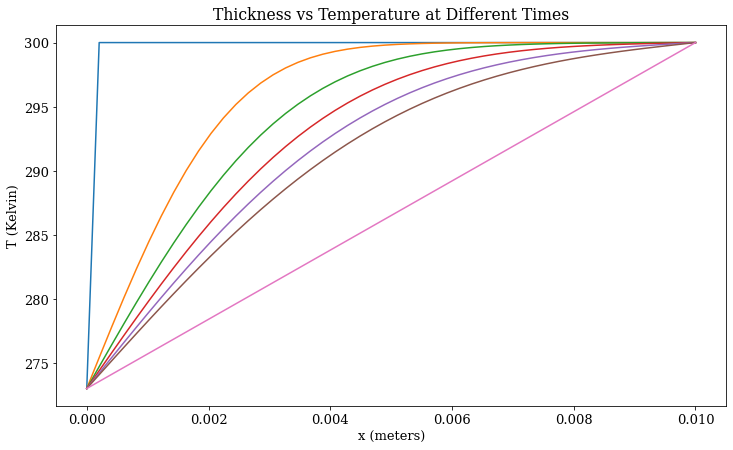

In [232]:
f = plotter(T4, L, 1)

In [238]:
m = (T4[-1, -1]-T4[-2, -2])/(f[-1] - f[-2])
print(f'The value of slope is: {m} , almost 2700')
F = -k*(m)
print("The heat flux is: ",F, ' w m^{-2}')

The value of slope is: 2699.9999997478617 , almost 2700
The heat flux is:  -2699.9999997478617  w m^{-2}


## With an insulating layer of air at 273 K

In [233]:
T5, intervals_5 = results(dt_new, Td_new, 300)

##############################################################
T5[1:-1,1] = T1[1:-1,1]      # in order to calculate T(j+1), we need T(j) and T(j-1)
##############################################################

### It'll take some time to run

In [234]:
# this cell will take some time to run, be patient

for j in range(intervals_5-2): # j runs over time intervals
    for i in range(N-2):       # i runs over space cells  #(N-2) makes sure that the code is not changing the value at right end
        if i > 0 and i <= 14:
            T5[i+1,j+2] = (1/( 1 + sigma_glass_new )) * ( (1 - sigma_glass_new) * ( T5[i+1,j] )  + sigma_glass_new * (T5[i+2,j+1] + T5[i, j+1])  )
            
        elif i > 14 and i <= 34:
            T5[i+1,j+2] = (1/( 1 + sigma_air )) * ( (1 - sigma_air) * ( T5[i+1,j] )  + sigma_air * (T5[i+2,j+1] + T5[i, j+1])  )
            
        else:
            T5[i+1,j+2] = (1/( 1 + sigma_glass_new )) * ( (1 - sigma_glass_new) * ( T5[i+1,j] )  + sigma_glass_new * (T5[i+2,j+1] + T5[i, j+1])  )

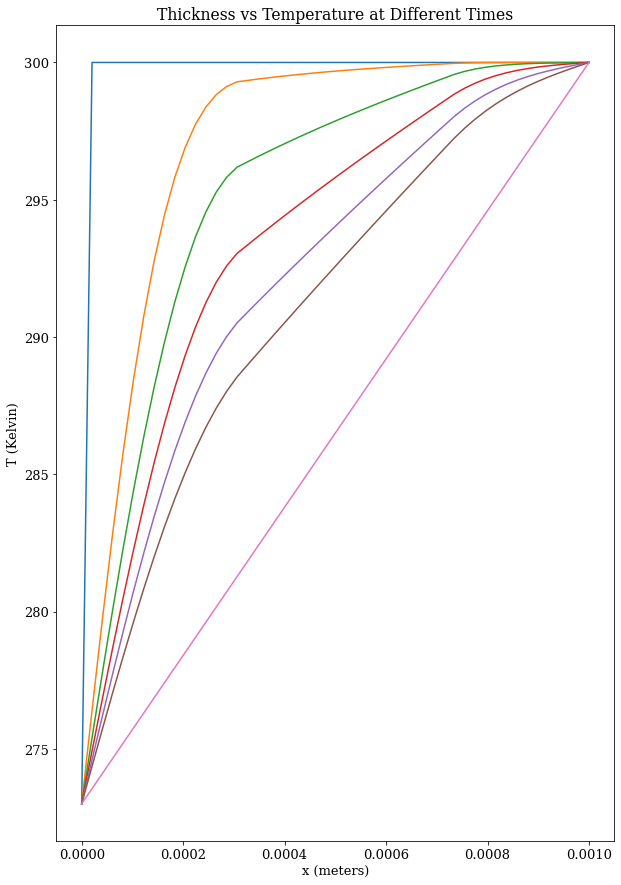

In [243]:
a = np.linspace(0, L_new, 50) # positions of space-cells/space-points

plt.figure(figsize=(10,15))
plt.title('Thickness vs Temperature at Different Times')
plt.plot(a,T5[:,0])
plt.plot(a,T5[:,30000])
plt.plot(a,T5[:,60000])
plt.plot(a,T5[:,90000])
plt.plot(a,T5[:,120000])
plt.plot(a,T5[:,150000])
plt.plot(a,T5[:,-1])
plt.xlabel('x (meters)')
plt.ylabel('T (Kelvin)')
plt.show()

#### The cusps or bends in the graph at the beginning and ending of air-region, are once again, pretty clear.

In [239]:
m_new = (T5[-1, -1] - T5[-2, -2])/(g[-1] - g[-2])
print(f'The value of slope is: {m_new} , AGAIN almost 2700')

F_new = -k*(m_new)  # since we are calculating the heat flux towards the exterior, and since the exterior is in glass-region 
                    # therefor we used 'k' for glass region
print("The heat flux is now : ",F_new, ' w m^{-2}')

The value of slope is: 26991.916026460294 , AGAIN almost 2700
The heat flux is now :  -26991.916026460294  w m^{-2}
